# 6.6 Sourcing & Analyzing Time-Series Data (Superstore data)

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Superstore Data

### 1. Importing your libraries and data

In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [15]:
path = '/Users/margoshogren/Library/CloudStorage/OneDrive-Personal/Documents/Margo-CF Folder-OD/A6 Adv Analytics and Dashboard design/Superstore'

In [16]:
SS = pd.read_csv(os.path.join(path,'Superstore.csv'), encoding = 'Latin-1')

In [7]:
SS.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
SS.shape

(9994, 21)

In [9]:
SS.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### 2. Subsetting, wrangling, and cleaning time-series data

In [19]:
# Create a subset with order date and Sales

SS_TS = SS[['Order Date','Sales']]
SS_TS.head()

,Order Date,Sales
0,11/8/16,261.9600
1,11/8/16,731.9400
2,6/12/16,14.6200
3,10/11/15,957.5775
4,10/11/15,22.3680


In [20]:
# Set the "datetime" column as the index

from datetime import datetime

SS_TS['datetime'] = pd.to_datetime(SS_TS['Order Date']) # Create a datetime column from "Order Date.""

SS_TS.head()

,Order Date,Sales,datetime
0,11/8/16,261.9600,2016-11-08
1,11/8/16,731.9400,2016-11-08
2,6/12/16,14.6200,2016-06-12
3,10/11/15,957.5775,2015-10-11
4,10/11/15,22.3680,2015-10-11


In [22]:
# extract mo-yr

SS_TS['yr-mo'] = SS_TS['datetime'].map(lambda x: x.strftime('%y-%m'))
SS_TS.set_index(['yr-mo'], inplace=True)
SS_TS.sort_index(inplace=True)
SS_TS

,Order Date,Sales,datetime
yr-mo,,,
14-01,1/10/14,51.940,2014-01-10
14-01,1/20/14,699.930,2014-01-20
14-01,1/13/14,37.408,2014-01-13
14-01,1/13/14,3.438,2014-01-13
14-01,1/7/14,10.430,2014-01-07
...,...,...,...
17-12,12/25/17,3.620,2017-12-25
17-12,12/25/17,96.080,2017-12-25
17-12,12/26/17,44.750,2017-12-26


In [23]:
SS_TS2 = SS_TS.groupby('yr-mo').agg(Sales_sum=pd.NamedAgg(column='Sales',aggfunc='sum'))
SS_TS2.head()

,Sales_sum
yr-mo,
14-01,14236.895
14-02,4519.892
14-03,55691.009
14-04,28295.345
14-05,23648.287


#### Find min and max of datetime

In [98]:
SS_TS2['datetime'].sort_values(ascending=True)[:5]

7980   2014-01-03
739    2014-01-04
740    2014-01-04
741    2014-01-04
1759   2014-01-05
Name: datetime, dtype: datetime64[ns]

In [48]:
SS_TS2['datetime'].sort_values(ascending=False)[:5]

906    2017-12-30
907    2017-12-30
1296   2017-12-30
1297   2017-12-30
645    2017-12-30
Name: datetime, dtype: datetime64[ns]

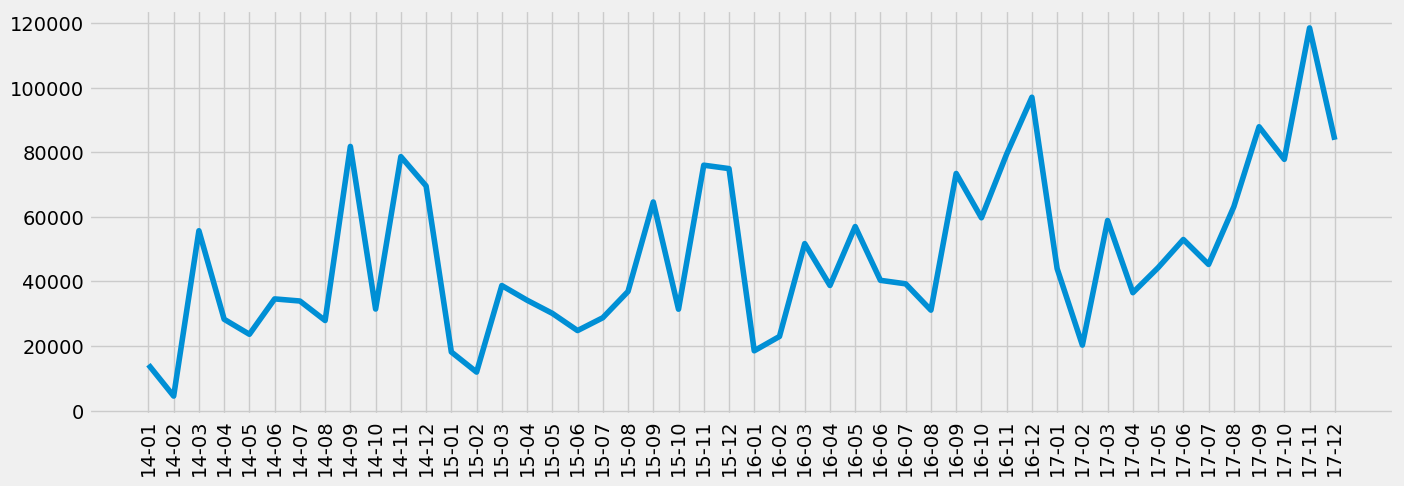

In [24]:
# Plot the new data set with year-mo

plt.figure(figsize=(15,5), dpi=100)
plt.plot(SS_TS2)

# specify rotation,size for the tick labels.
plt.xticks(rotation='vertical'),
plt.rc('xtick', labelsize=10)  


### Inference:
data is trending up in 2017 and has spikes up in March,September, November,December and spikes downward in February.

In [25]:
# aggregate data with datetime for decomposing

SS_TS3 = SS_TS.groupby('datetime').agg(Sales_sum=pd.NamedAgg(column='Sales',aggfunc='sum'))
SS_TS3.head()

,Sales_sum
datetime,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [27]:
# Check for missing values 

SS_TS3.isnull().sum() 

Sales_sum    0
dtype: int64

In [28]:
# Check for duplicates

dups = SS_TS3[SS_TS3.duplicated()]
dups.sum()

SS_TS3.sort_values(by=['Sales_sum'], inplace=True)
SS_TS3C = SS_TS3[SS_TS3['Sales_sum'].duplicated(keep=False)]
SS_TS3C.head()
# not a dup!

,Sales_sum
datetime,
2015-11-25,13.12
2015-01-24,13.12
2017-09-12,491.55
2014-06-10,491.55


In [29]:
SS_TS3.head()

,Sales_sum
datetime,
2015-07-19,2.025
2017-07-12,3.816
2014-01-28,3.928
2014-06-24,4.272
2014-10-01,4.710


In [23]:
SS_TS3.columns

Index(['Sales_sum'], dtype='object')

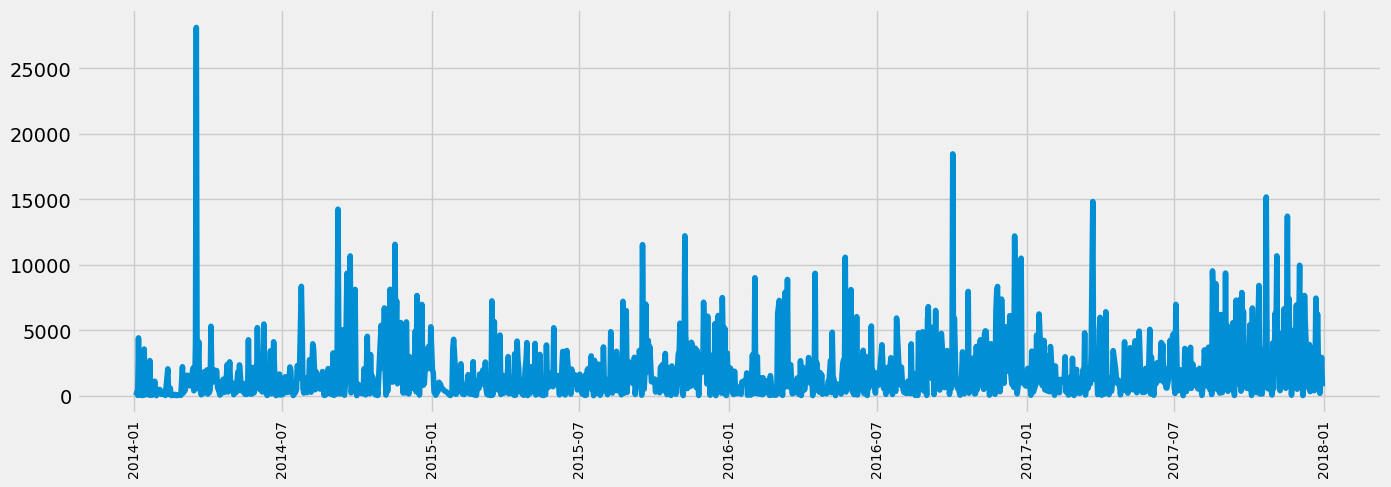

In [26]:
# Plot the new data set with datetime

plt.figure(figsize=(15,5), dpi=100)
plt.plot(SS_TS3)

# specify rotation,size for the tick labels.
plt.xticks(rotation='vertical'),
plt.rc('xtick', labelsize=10)  

### Inference:
The sales has a high spike between Jan-July 2014 and between July-Dec 2016 and again between Jan-July 2017. Also a greater number of higher sales at the end of 2017.

### 3. Time-series analysis: decomposition

In [18]:
SS_TS3.head()

,Sales_sum
datetime,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [31]:
# Decompose the time series using an additive model

decomposition=sm.tsa.seasonal_decompose(SS_TS3['Sales_sum'].resample('W').sum(),model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

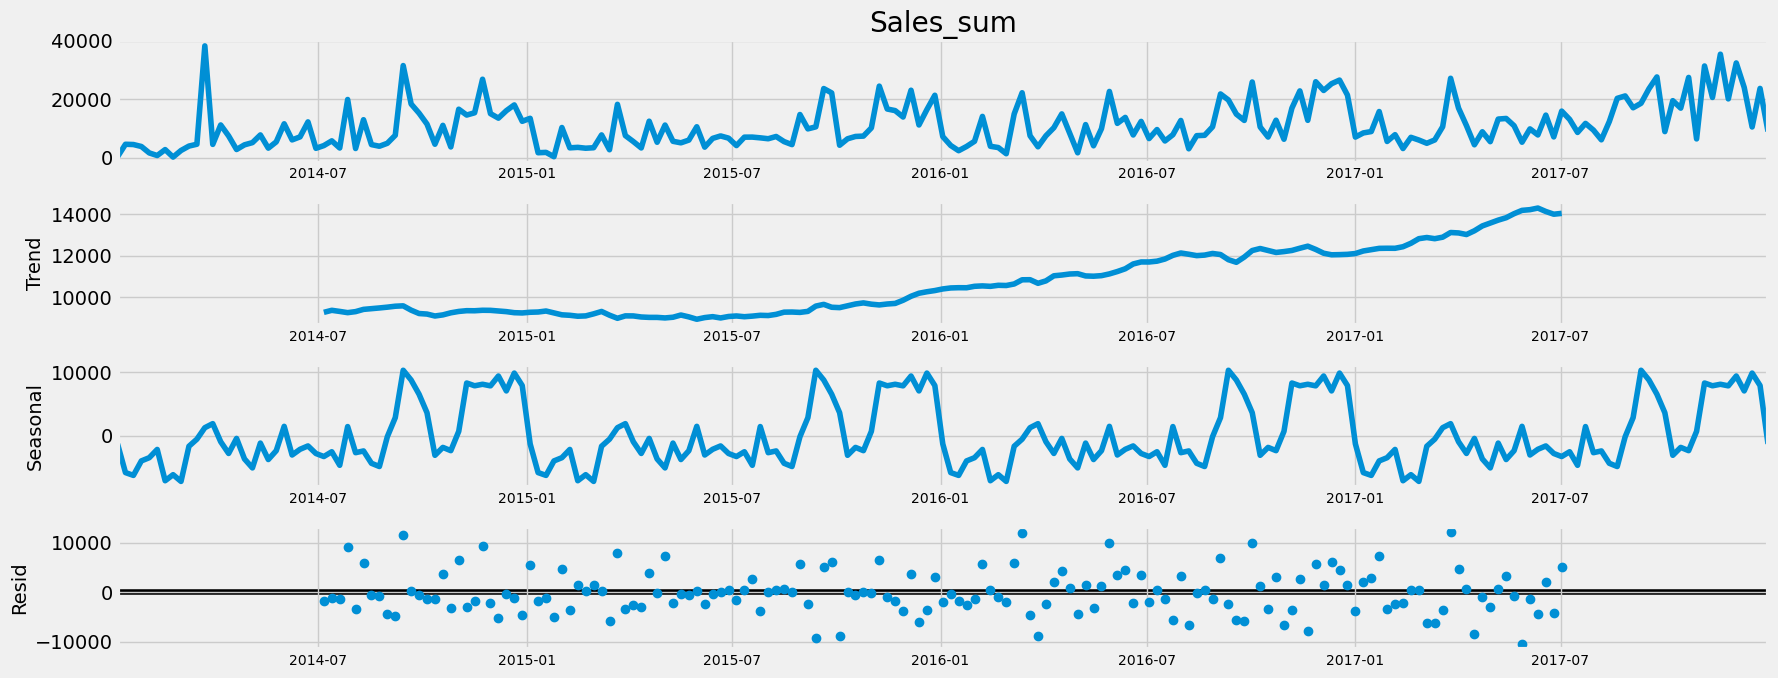

In [37]:
# Plot the separate components

decomposition.plot()
plt.show()

### Inference: 
Since the level and trend are different there we there is noise in the data representing fluctuations unexplained by the trend. The is a dominant trend in sales upwards between 2016 and 2017. The Seasonality chart shows upward spike in sales around fall and the end of the year. The residual chart shows noise left throughout the chart period.

### 4. Testing for stationarity

In [35]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(SS_TS3['Sales_sum'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.786747
p-value                           0.822984
Number of Lags Used              23.000000
Number of Observations Used    1213.000000
Critical Value (1%)              -3.435752
Critical Value (5%)              -2.863926
Critical Value (10%)             -2.568040
dtype: float64


#### Inference:
The Test statistic is greater than the 5% citical value but the p-value is greater than .05, so the result is not significant and we cannot reject the null hypothesis. We will try to make the data stationary in the following formulas.

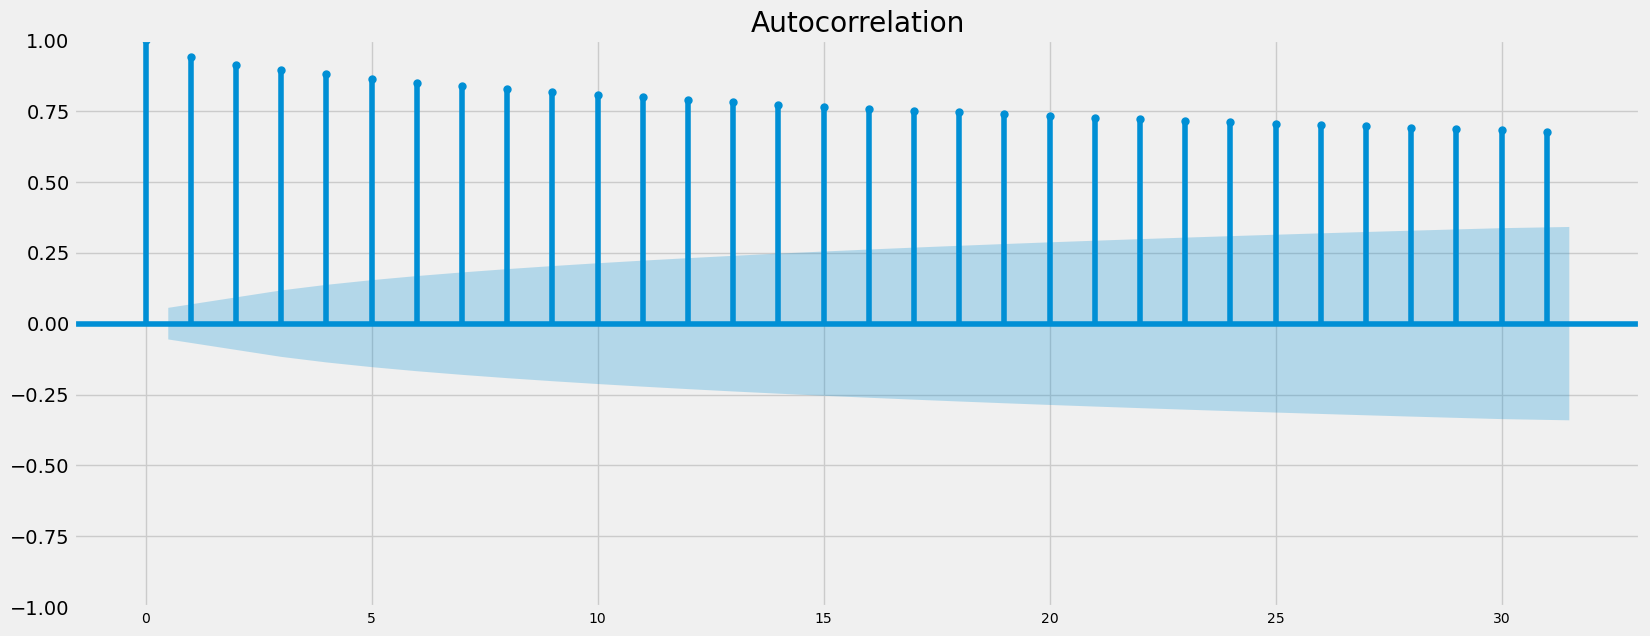

In [51]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(SS_TS3)
plt.show()

### Inference:
There are many lags beyond the confidence level, so they are correlated to each other. This indicates non-stationary data.

### 5. Stationarizing the Superstore Data

In [43]:
data_diff = SS_TS3 - SS_TS3.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [45]:
data_diff.head()

,Sales_sum
datetime,
2017-07-12,1.791
2014-01-28,0.112
2014-06-24,0.344
2014-10-01,0.438
2015-12-16,0.270


In [46]:
data_diff.columns

Index(['Sales_sum'], dtype='object')

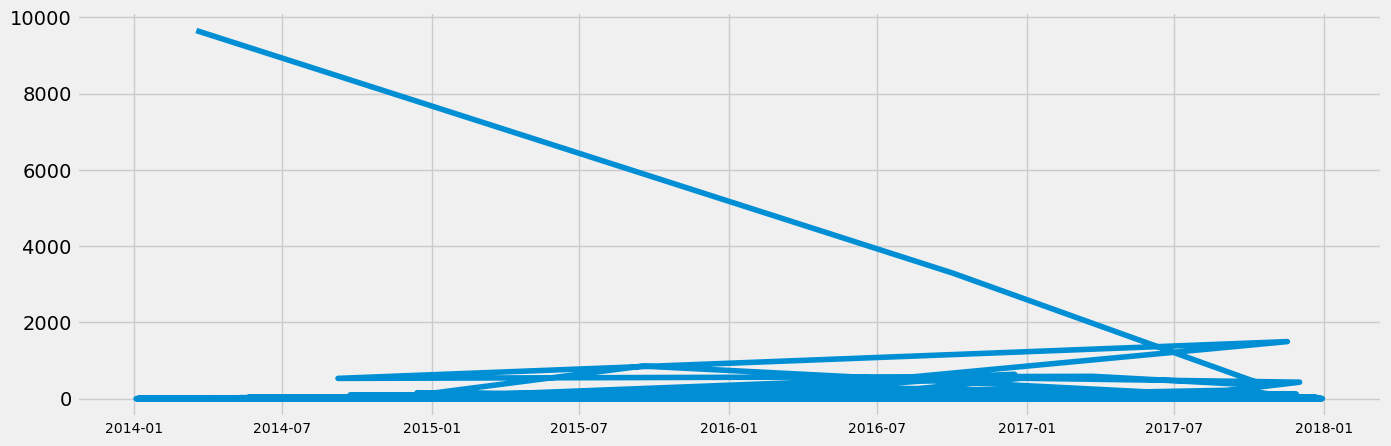

In [47]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [48]:
# Check dickey-fuller stats after the differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -3.607310
p-value                           0.005623
Number of Lags Used              23.000000
Number of Observations Used    1212.000000
Critical Value (1%)              -3.435757
Critical Value (5%)              -2.863928
Critical Value (10%)             -2.568041
dtype: float64


### Inference:
The test statistic is less than the 5% critical value and the p-value is still less than .05. We can reject the null hypothesis and the data is now stationary.

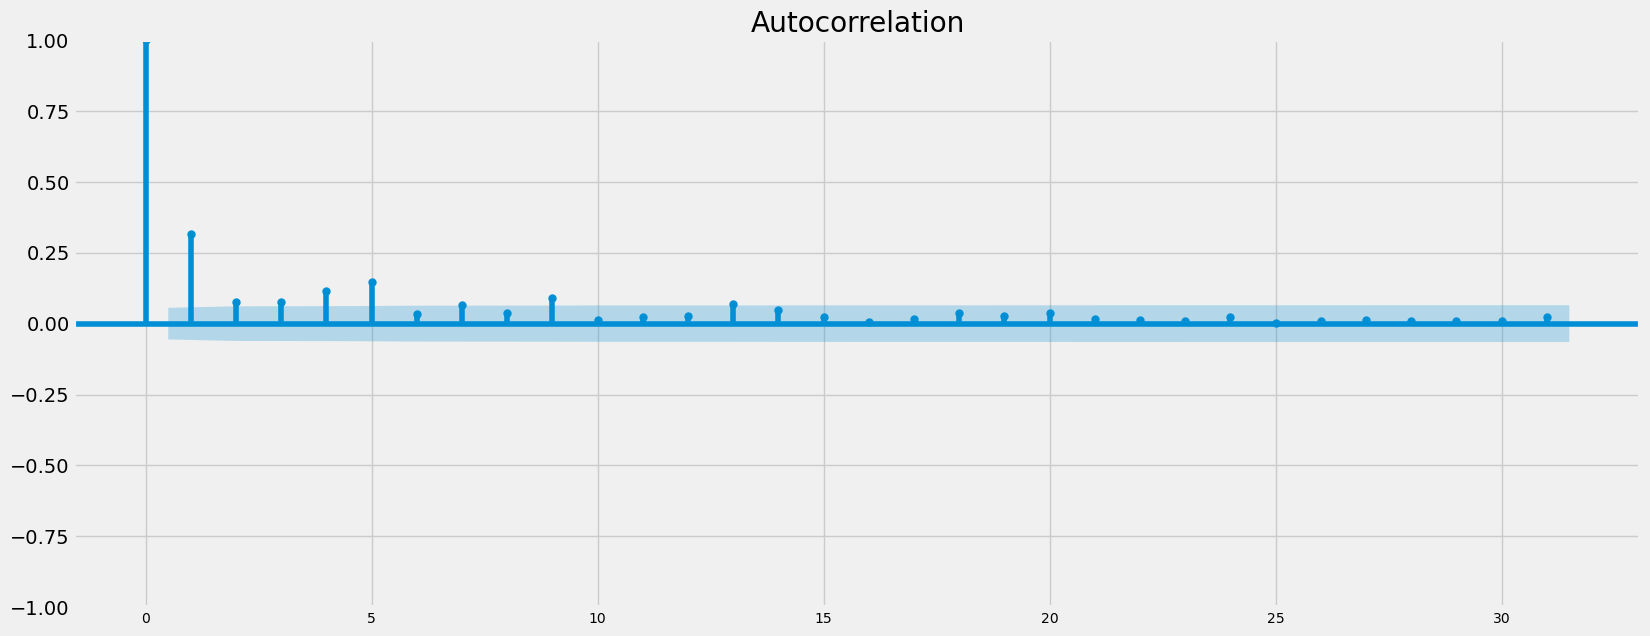

In [49]:
plot_acf(data_diff)
plt.show()

#### Inference: The autocorrelation is now mostly in the confidence level and is stationary.